# Hypothesis Testing
Lets evaluate a data set of dice roles and see if its rigged! to do so we will follow these steps:
1. Visualize and undrestand the data
2. Quantify the data
3. Pose a hypothesis
4. Calculate

## Basics of Testing
### Null Hupothesis:
nothing is wrong and everything is working as intended. This is the hypothesis that we'll see if we reject. i.e. the dice is fair.

We don't usually believe our null hypothesis (or H0) to be true. However, we need some exact statement as a starting point for statistical significance testing.

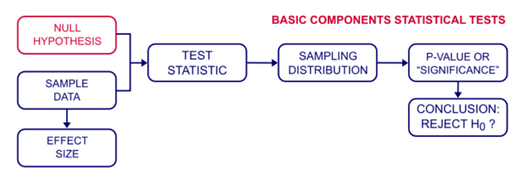

### Confidance (significance):
we can reject null hypothesis once reach a certain amount of confidance that our assumption is true. This is also known as the thresholds on probability at which point we may reject the null hypothesis.

* The further away a value falls from the mean, the less likely that the value is obtainable, therefor a greater significance if obtained. Since null hypothesis assumes a mean = 0 and standard deviation = 1, we can then reject the null hypothesis. a smaller p-value indicates that we can reject the null hypothesis with a greater confidance.

### T-Test
When you conduct a test of statistical significance, you are given a p-value somewhere in the output. If your test statistic is symmetrically distributed, you can select one of three alternative hypotheses. Two of these correspond to one-tailed tests and one corresponds to a two-tailed test.  However, the p-value presented is (almost always) for a two-tailed test. 

### What is a one-tailed test?
If you are using a significance level of .05, a one-tailed test is testing the statistical significance in the one direction of interest. This means that .05 is in one tail of the distribution of your test statistic. When using a one-tailed test, you are testing for the possibility of the relationship in one direction and completely disregarding the possibility of a relationship in the other direction.

Let’s compare the mean of a sample to a given value x using a t-test. Our null hypothesis is that the mean is equal to x. A one-tailed test will test either if the mean is significantly greater than x or if the mean is significantly less than x, but not both. 

Then, depending on the chosen tail, the mean is significantly greater than or less than x if the test statistic is in the top 5% of its probability distribution or bottom 5% of its probability distribution, resulting in a p-value less than 0.05.  The one-tailed test provides more power to detect an effect in one direction by not testing the effect in the other direction. 

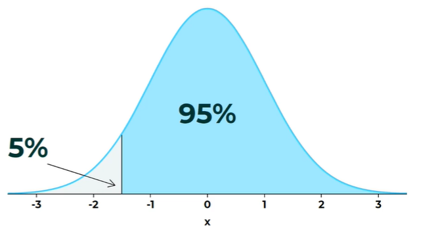 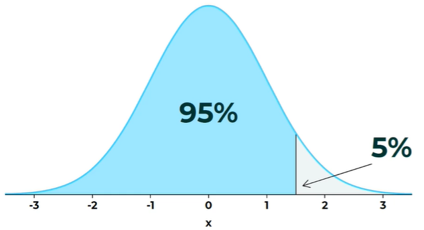

### What is a two-tailed test?
If you are using a significance level of 0.05, a two-tailed test allots half of your alpha to testing the statistical significance in one direction and half of your alpha to testing statistical significance in the other direction. 

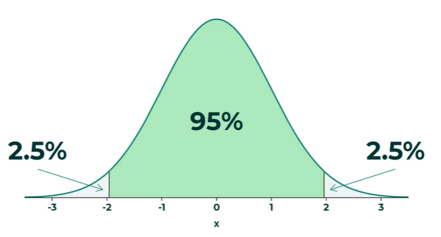

This means that .025 is in each tail of the distribution of your test statistic. When using a two-tailed test, regardless of the direction of the relationship you hypothesize, you are testing for the possibility of the relationship in both directions. For example, we may wish to compare the mean of a sample to a given value x using a t-test. Our null hypothesis is that the mean is equal to x. 

A two-tailed test will test both if the mean is significantly greater than x and if the mean significantly less than x. The mean is considered significantly different from x if the test statistic is in the top 2.5% or bottom 2.5% of its probability distribution, resulting in a p-value less than 0.05.   


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read dataset
df = pd.read_csv('Meteorite_Landings.csv')
print(df.head(1))
print(df.info())

     name  id nametype recclass  mass  fall    year  reclat  reclong  \
0  Aachen   1    Valid       L5  21.0  Fell  1880.0  50.775  6.08333   

             GeoLocation  
0  (50.775000, 6.083330)  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB
None


In [3]:
# filter data based on mass and year
# drop all rows with null value
df = df.dropna(subset=['mass', 'year'])

# ensure all data point of mass are more than 0
df = df[df['mass'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45292 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45292 non-null  object 
 1   id           45292 non-null  int64  
 2   nametype     45292 non-null  object 
 3   recclass     45292 non-null  object 
 4   mass         45292 non-null  float64
 5   fall         45292 non-null  object 
 6   year         45292 non-null  float64
 7   reclat       38097 non-null  float64
 8   reclong      38097 non-null  float64
 9   GeoLocation  38097 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.8+ MB


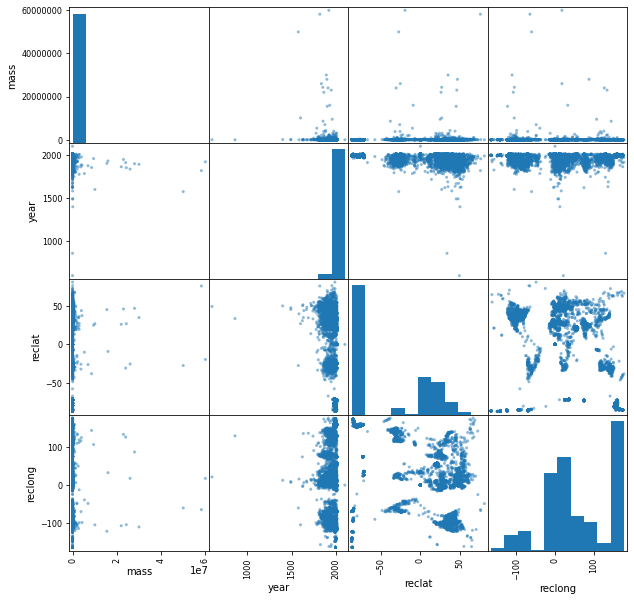

In [6]:
pd.plotting.scatter_matrix(df[['mass', 'year', 'reclat', 'reclong']], figsize=(10, 10));

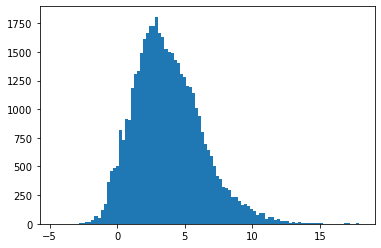

In [12]:
# pull out year and mass and analyze them
year = df.year
mass = df.mass
logmass = np.log(mass)
plt.hist(logmass, bins=100);

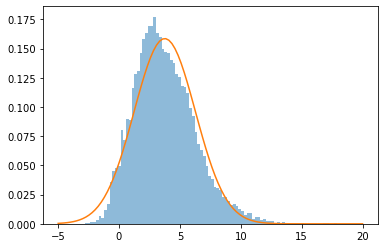

In [15]:
# lets characterize the log distribution
from scipy.stats import norm, skewnorm, lognorm

# build line space values
ms = np.linspace(-5, 20, 100)

# obtain mean and std
mean, std = logmass.mean(), np.std(logmass)

# obtain probability disribution function
pdf_norm = norm.pdf(ms, mean, std)

# plot logmass with probability denisty and normal on top
plt.hist(logmass, bins=100, density=True, alpha=0.5)
plt.plot(ms, pdf_norm);

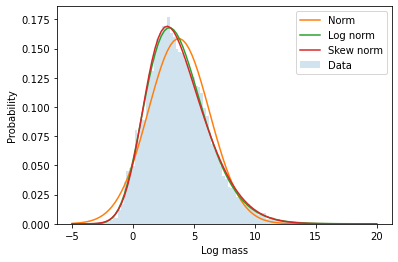

In [16]:
# checking a lognorm fit
param_lognorm = lognorm.fit(logmass)
pdf_lognorm = lognorm.pdf(ms, *param_lognorm)

# check with skewnorm
param_skewnorm = skewnorm.fit(logmass)
pdf_skewnorm = skewnorm.pdf(ms, *param_skewnorm)

# plot lognorm and skewnorm
plt.hist(logmass, bins=100, density=True, alpha=0.2, label="Data")
plt.plot(ms, pdf_norm, label="Norm")
plt.plot(ms, pdf_lognorm, label="Log norm")
plt.plot(ms, pdf_skewnorm, label="Skew norm");
plt.legend()
plt.xlabel("Log mass")
plt.ylabel("Probability");

In [21]:
# sample one-tailed t-test where the probability of mass being bigger than 1km is being tested
counts = year.value_counts()
mass_of_doom = np.log((4/3) * np.pi * 500**3 * 1600 * 1000)  # Just using a spherical approximation and some avg density
prob_small_mass = lognorm.logcdf(mass_of_doom, *param_lognorm)
frac_sky_monitored = 0.2
num_years = 1000
num_events = num_years * counts.max() / frac_sky_monitored
prob_bad = 1 - np.exp(num_events * prob_small_mass)
print(f"Probability of an asteroid over 1km+  impacting earth within {num_years} years is {prob_bad * 100:.2f}%")

Probability of an asteroid over 1km+  impacting earth within 1000 years is 0.67%
